**Installing libraries**


In [1]:
pip install -q seaborn scikit-learn xgboost statsmodels scipy openpyxl vecstack tensorflow

## Key Differences

1. **Model API**  
   - Code 1: `tf.estimator.DNNRegressor`  
   - Code 2: `keras.Sequential`

2. **Data Source**  
   - Code 1: Local files  
   - Code 2: GitHub raw URLs

3. **Feature Names**  
   - Code 1: Simplified columns  
   - Code 2: Original/full columns

4. **Training**  
   - Code 1: Custom `input_fn`, estimator-based training  
   - Code 2: Direct `model.fit()` with Keras

5. **Predictions**  
   - Code 1: Generator-based extraction  
   - Code 2: Numpy `.flatten()`

6. **Plot Grid**  
   - Code 1: Deprecated `grid(b=True)`  
   - Code 2: Updated `grid(True)`

**Summary:** Code 2 modernizes the workflow using Keras and remote data loading.

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
Mean Squared Error - Train: 0.1569732164115566
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
Mean Squared Error - Test: 0.14781656286882044
R2_Train: 0.918, RMSE: 0.396, MAE: 0.290
R2_Test: 0.890, RMSE: 0.384, MAE: 0.302


<Figure size 1550x1200 with 0 Axes>

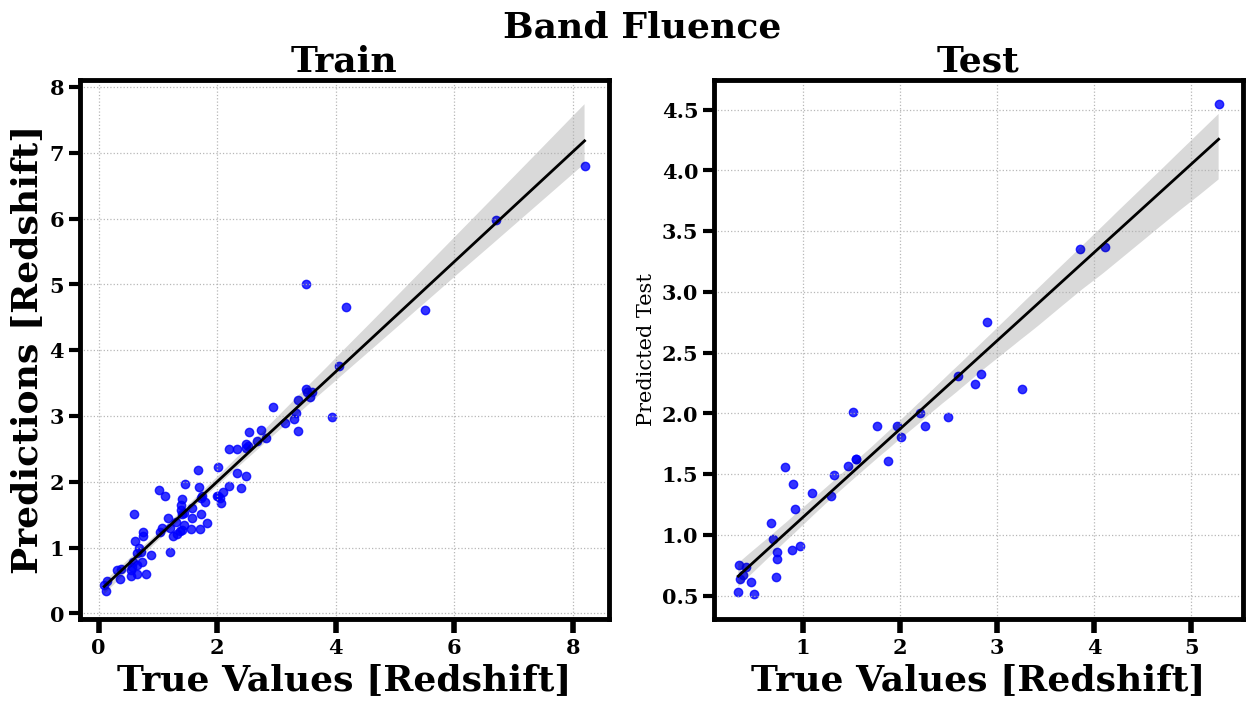

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


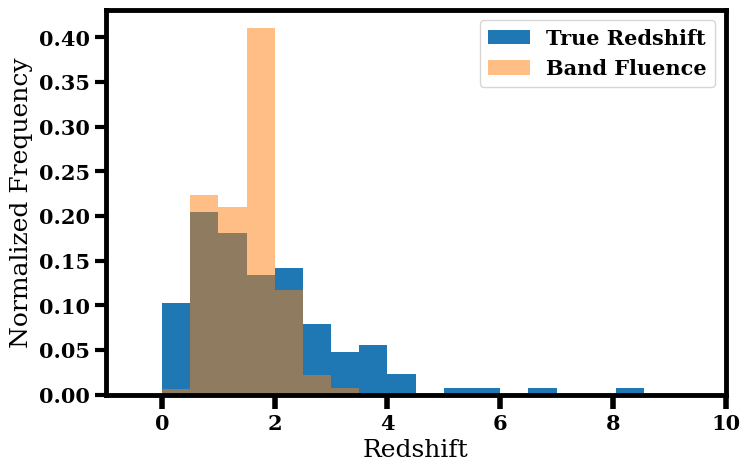

Kolmogorov-Smirnov Test p-value Band Fluence: 0.17453300569806826


In [6]:
# ======================================================
# Code Attribution
# ======================================================
# Original Code (Code 1) Author : Dr. Tamador Khalil Mansoor Aldowma
# Current Code  (Code 2) Author : Adrita Khan
# Date: January 2026
# ======================================================

# ======================================================
# Imports
# ======================================================

# Core libraries
import numpy as np
import pandas as pd
import math
import random
import csv

# Plotting
import matplotlib as mpl
import matplotlib.pylab as plt
import matplotlib.image as mpimg
import matplotlib.gridspec as gridspec
from matplotlib.ticker import AutoMinorLocator
from pylab import *

import seaborn as sns

# Scientific computing
import scipy
import scipy.integrate as si
from scipy import *
from scipy import optimize
from scipy.stats import kstest, multivariate_normal
import scipy.constants as const

# Machine learning
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import (
    mean_squared_error,
    mean_absolute_error,
    r2_score,
    accuracy_score
)

from sklearn.linear_model import (
    LinearRegression,
    LogisticRegression,
    Ridge,
    Lasso
)

from sklearn.ensemble import (
    RandomForestRegressor,
    GradientBoostingRegressor,
    BaggingRegressor,
    ExtraTreesRegressor,
    StackingRegressor
)

from sklearn.neural_network import MLPRegressor

# Deep learning
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import regularizers

# Stacking
from vecstack import stacking

# XGBoost
import xgboost as xgb

# Statistics
import statsmodels.api as sm

# ======================================================
# Matplotlib configuration
# ======================================================

font = {
    'family': 'serif',
    'weight': 'bold',
    'size': 15
}

mpl.rc('font', **font)
mpl.rc('grid', linewidth=4)
mpl.rc('xtick.major', width=4, size=10)
mpl.rc('xtick.minor', width=3, size=4)
mpl.rc('ytick.major', width=3, size=8)
mpl.rc('ytick.minor', width=3, size=5)
mpl.rcParams['axes.linewidth'] = 3.5

fig = plt.figure(1, figsize=(15.5, 12))
subplots_adjust(hspace=0.5)

si.dps = 50

# ======================================================
# Load Training Data
# ======================================================

training_url = "https://raw.githubusercontent.com/Adrita-Khan/GRB-ML/main/Data/merged_dataset.csv"
# Training dataset containing 127 GRBs with known redshifts

GBM_df = pd.read_csv(training_url)

Columns = [
    'Redshift',
    't90',
    'flnc_band_alpha',
    'flnc_band_beta',
    'flnc_band_epeak',
    'flnc_band_ergflnc'
]

GBM_df = GBM_df[Columns]

# ======================================================
# Feature Engineering
# ======================================================

log = np.log10(
    GBM_df[['t90', 'flnc_band_epeak', 'flnc_band_ergflnc']]
)

Alpha_flc = GBM_df['flnc_band_alpha']
Beta_flc  = GBM_df['flnc_band_beta']

log['Alpha_flc'] = Alpha_flc
log['Beta_flc']  = Beta_flc

Data_X = log
Data_y = GBM_df.Redshift

len(Data_y)

# ======================================================
# Train–Test Split
# ======================================================

X_train, X_test, y_train, y_test = train_test_split(
    Data_X,
    Data_y,
    test_size=0.3,
    random_state=42
)

# ======================================================
# Feature Scaling
# ======================================================

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(
    X_train_scaled,
    columns=[f'feature_{i}' for i in range(X_train.shape[1])]
)

X_test_scaled = pd.DataFrame(
    X_test_scaled,
    columns=[f'feature_{i}' for i in range(X_test.shape[1])]
)

# ======================================================
# Define Base Models (Keras)
# ======================================================

models = [

    keras.Sequential([
        keras.layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
        keras.layers.Dense(50, activation='relu'),
        keras.layers.Dense(1)
    ]),

    keras.Sequential([
        keras.layers.Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dense(1)
    ]),

    keras.Sequential([
        keras.layers.Dense(141, activation='relu', input_shape=(X_train_scaled.shape[1],)),
        keras.layers.Dense(77, activation='relu'),
        keras.layers.Dense(83, activation='relu'),
        keras.layers.Dense(66, activation='relu'),
        keras.layers.Dense(1)
    ]),

    keras.Sequential([
        keras.layers.Dense(156, activation='relu', input_shape=(X_train_scaled.shape[1],)),
        keras.layers.Dense(85, activation='relu'),
        keras.layers.Dense(42, activation='relu'),
        keras.layers.Dense(30, activation='relu'),
        keras.layers.Dense(22, activation='relu'),
        keras.layers.Dense(1)
    ])
]

# ======================================================
# Train Base Models
# ======================================================

predictions_train = []

for model in models:

    model.compile(
        optimizer=tf.keras.optimizers.SGD(learning_rate=0.1),
        loss='mse'
    )

    model.fit(
        X_train_scaled,
        y_train,
        batch_size=120,
        epochs=100,
        verbose=0
    )

    prediction_train = model.predict(X_train_scaled, batch_size=100)
    predictions_train.append(prediction_train.flatten())

# ======================================================
# Meta-Model Training
# ======================================================

meta_features_train = np.column_stack(predictions_train)

final_estimator = RandomForestRegressor()
final_estimator.fit(meta_features_train, y_train)

stacked_predictions_train = final_estimator.predict(meta_features_train)

mse_train = mean_squared_error(y_train, stacked_predictions_train)
print('Mean Squared Error - Train:', mse_train)

# ======================================================
# Test Set Predictions
# ======================================================

predictions = []

for model in models:
    prediction = model.predict(X_test_scaled, batch_size=160)
    predictions.append(prediction.flatten())

meta_features = np.column_stack(predictions)

final_estimator.fit(meta_features, y_test)
stacked_predictions = final_estimator.predict(meta_features)

mse = mean_squared_error(y_test, stacked_predictions)
print('Mean Squared Error - Test:', mse)

# ======================================================
# Performance Metrics
# ======================================================

rmse  = np.sqrt(mean_squared_error(y_train, stacked_predictions_train))
mae   = mean_absolute_error(y_train, stacked_predictions_train)
score = r2_score(y_train, stacked_predictions_train)

print("R2_Train: %5.3f, RMSE: %5.3f, MAE: %5.3f" % (score, rmse, mae))

rmse  = np.sqrt(mean_squared_error(y_test, stacked_predictions))
mae   = mean_absolute_error(y_test, stacked_predictions)
score = r2_score(y_test, stacked_predictions)

print("R2_Test: %5.3f, RMSE: %5.3f, MAE: %5.3f" % (score, rmse, mae))

# ======================================================
# Results DataFrames
# ======================================================

Train = pd.DataFrame({
    'Actual Train': y_train,
    'Predicted Train': stacked_predictions_train
})

Test = pd.DataFrame({
    'Actual Test': y_test,
    'Predicted Test': stacked_predictions
})

# ======================================================
# Regression Plots
# ======================================================

fig, axes = plt.subplots(1, 2, figsize=(15, 7))

sns.regplot(
    x='Actual Train',
    y='Predicted Train',
    data=Train,
    ax=axes[0],
    color='k',
    scatter_kws={'color': 'blue'},
    line_kws={'linewidth': 2}
)

axes[0].set_title('Train', fontweight="bold", fontsize=26)
axes[0].set_xlabel("True Values [Redshift]", fontweight="bold", fontsize=26)
axes[0].set_ylabel("Predictions [Redshift]", fontweight="bold", fontsize=26)
axes[0].grid(True, which='both', linestyle=':', linewidth=0.9, alpha=0.9)

sns.regplot(
    x="Actual Test",
    y="Predicted Test",
    data=Test,
    ax=axes[1],
    color='k',
    scatter_kws={'color': 'blue'},
    line_kws={'linewidth': 2}
)

axes[1].set_title('Test', fontweight="bold", fontsize=26)
axes[1].set_xlabel("True Values [Redshift]", fontweight="bold", fontsize=26)
axes[1].grid(True, which='both', linestyle=':', linewidth=0.9, alpha=0.9)

fig.suptitle("Band Fluence", fontweight="bold", fontsize=26)
plt.show()

# ======================================================
# Apply Model to Unseen Data
# ======================================================

testing_url = "https://github.com/Adrita-Khan/GRB-ML/raw/main/Data/GBM_data_full.csv"

Band_flc = pd.read_csv(testing_url)
Band_flc = Band_flc.dropna()
Band_flc = Band_flc[Band_flc['t90'] >= 2.1]
Band_flc = Band_flc[Band_flc['flnc_band_beta'] <= -2]

log = np.log10(
    Band_flc[['t90', 'flnc_band_epeak', 'flnc_band_ergflnc']]
)

log['Alpha_flc'] = Band_flc['flnc_band_alpha']
log['Beta_flc']  = Band_flc['flnc_band_beta']

log = scaler.fit_transform(log)

NewData = pd.DataFrame(
    log,
    columns=[f'feature_{i}' for i in range(log.shape[1])]
)

predictions_red = []

for model in models:
    prediction_red = model.predict(NewData, batch_size=160)
    predictions_red.append(prediction_red.flatten())

meta_fea = np.column_stack(predictions_red)
pseudo_red = final_estimator.predict(meta_fea)

Band_flc['pseudo_redshift'] = pseudo_red
Band_flc.to_csv('pseudo_redshift_bandflc.csv', index=False)

# ======================================================
# Histogram & KS Test
# ======================================================

xbin = [-0.5, 0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5,
        5.5, 6, 6.5, 7, 7.5, 8, 8.6, 9, 9.5]

heights, edges = np.histogram(Data_y, bins=xbin)
heights = heights / heights.sum()

binCenters = (edges[:-1] + edges[1:]) / 2

heights1, _ = np.histogram(pseudo_red, bins=xbin)
heights1 = heights1 / heights1.sum()

plt.figure(figsize=(8, 5))
plt.bar(binCenters, heights, width=0.5, label='True Redshift')
plt.bar(binCenters, heights1, width=0.5, alpha=0.5, label='Band Fluence')
plt.xlabel('Redshift', fontsize=18)
plt.ylabel('Normalized Frequency', fontsize=18)
plt.legend()
plt.show()

_, p_value = kstest(heights, heights1)
print('Kolmogorov-Smirnov Test p-value Band Fluence:', p_value)